<a href="https://colab.research.google.com/github/SAZA-KARTIAN/Cursos_Kaggle/blob/main/Notebook_Limpieza_de_Datos_de_Kaggle_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔍Manejo de valores faltantes


##🔹 Echemos un primer vistazo a los datos
Lo primero que necesitaremos hacer es cargar las librerías y el dataset que utilizaremos.
Usaremos un conjunto de datos de eventos que ocurrieron en partidos de fútbol americano. En el siguiente ejercicio, aplicarás tus nuevas habilidades a un dataset de permisos de construcción emitidos en San Francisco.

In [17]:
# Módulos que usaremos
import pandas as pd
import numpy as np

# Leemos todos nuestros datos
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

# Fijamos una semilla para reproducibilidad
np.random.seed(0)

<ipython-input-17-34d596c37208>:6: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")


##🔹 Revisemos los primeros datos

La primera cosa que debes hacer al recibir un nuevo dataset es revisar una muestra. Esto te permite verificar que se haya leído correctamente y te da una idea de cómo son los datos.

Vamos a ver si hay valores faltantes, que se representarán como NaN o None.

In [14]:
# Mostrar las primeras 5 filas del dataset
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


##❓ ¿Cuántos valores faltantes hay?

Sabemos que hay valores faltantes. Veamos cuántos hay por columna:

In [15]:
# Contar valores faltantes por columna
missing_values_count = nfl_data.isnull().sum()

# Ver los 10 primeros
missing_values_count[0:10]


,0
Date,0
GameID,0
Drive,0
qtr,0
down,27755
time,99
TimeUnder,0
TimeSecs,99
PlayTimeDiff,198
SideofField,239


¡Eso parece bastante! Veamos el porcentaje de datos faltantes respecto al total del dataset:

In [19]:
# Total de celdas
total_cells = np.prod(nfl_data.shape)

# Total de valores faltantes
total_missing = missing_values_count.sum()

# Porcentaje de datos faltantes
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)


23.26629406826059


##🤔 ¿Por qué faltan los datos?

Aquí es donde entra la intuición de datos, es decir, observar detenidamente el dataset para entender por qué faltan los datos y cómo eso puede afectar el análisis.

Una de las preguntas más importantes es:

**¿El valor falta porque no se registró o porque no existe?**


*   Si el valor no existe (como la estatura del hijo mayor de alguien que no tiene hijos), tiene sentido dejarlo como NaN.

*   Si el valor no fue registrado, podemos intentar inferirlo (esto se llama imputación).

Por ejemplo, la columna "TimeSecs" representa los segundos restantes en el juego cuando se hizo una jugada. Es probable que estos valores falten porque no fueron registrados, por lo que podríamos intentar imputarlos.

En cambio, la columna "PenalizedTeam" tiene valores faltantes porque, si no hubo penalización, no hay equipo penalizado. En ese caso, dejarlo vacío o asignar un valor como "ninguno" tendría más sentido.

##📝 Consejo:
Leer la documentación del dataset o hablar con quien lo proporcionó puede ayudarte mucho a entender por qué faltan los valores.

##🧹 Eliminar valores faltantes

Si estás apurado o no necesitas investigar por qué faltan los datos, puedes simplemente eliminar las filas o columnas que contienen NaN.

##⚠️ Advertencia:
Este enfoque no es recomendable para proyectos importantes. Puede eliminar datos valiosos.

In [20]:
# Eliminar filas con algún valor faltante
nfl_data.dropna()


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


##🔻 Resultado:
 ¡Ups! ¡Se eliminó todo el dataset! 😱
Cada fila tenía al menos un valor faltante.

Probemos eliminar columnas con al menos un valor faltante:

In [21]:
# Eliminar columnas con valores faltantes
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()


,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,HomeTeam,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,PIT,TEN,0,3,3,3,3,3,0.0,0.0
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,PIT,TEN,0,3,3,3,3,3,0.0,0.0
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,PIT,TEN,0,3,3,3,3,3,0.0,0.0
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,PIT,TEN,0,3,3,3,3,3,0.0,0.0
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,PIT,TEN,0,3,3,3,3,3,0.0,0.0


Verifiquemos cuántas columnas perdimos:

In [22]:
print("Columnas en el dataset original: %d \n" % nfl_data.shape[1])
print("Columnas tras eliminar las que tienen NA: %d" % columns_with_na_dropped.shape[1])


Columnas en el dataset original: 102 

Columnas tras eliminar las que tienen NA: 36


##🧩 Rellenar valores faltantes automáticamente

Otra opción es rellenar los valores faltantes.

Vamos a tomar una pequeña sección del dataset para mostrarlo mejor:

In [23]:
# Seleccionamos un subconjunto
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


Podemos usar .fillna() para reemplazar los NaN por un valor fijo, por ejemplo 0:

In [24]:
# Reemplazar todos los NA con 0
subset_nfl_data.fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


##🧠 También puedo ser un poco más astuto...

Podría usar una estrategia un poco más inteligente y reemplazar los valores faltantes con el valor que aparece directamente después de ellos en la misma columna. Esto tiene mucho sentido para datasets donde las observaciones siguen un orden lógico (como registros de tiempo, eventos secuenciales, etc.).

In [25]:
# Reemplazar todos los NA con el valor siguiente en la misma columna,
# y luego reemplazar los NA restantes con 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


<ipython-input-25-59afa4418af6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


------------

-----------------------------------------------

#📊 Escalamiento y normalización de datos



En este notebook, vamos a ver cómo escalar y normalizar datos (¡y cuál es la diferencia entre ambas cosas!).

¡Comencemos!

##⚙️ Configurar el entorno
Lo primero que debemos hacer es cargar las librerías que utilizaremos:

In [26]:
# Módulos que usaremos
import pandas as pd
import numpy as np

# Para la transformación Box-Cox
from scipy import stats

# Para escalamiento min-max
from mlxtend.preprocessing import minmax_scaling

# Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

# Fijamos una semilla para reproducibilidad
np.random.seed(0)


##📏 Escalamiento vs. Normalización:
¿Cuál es la diferencia?
Una de las razones por las que es fácil confundirse entre escalamiento y normalización es porque a veces los términos se usan indistintamente. Y para hacerlo aún más confuso, ¡son bastante parecidos! En ambos casos, estás transformando los valores de variables numéricas para que los datos transformados tengan ciertas propiedades útiles.

La diferencia es que:

En el escalamiento, estás cambiando el rango de tus datos.

En la normalización, estás cambiando la forma de la distribución de tus datos.

Veamos cada una de estas opciones en más detalle.

##🔹 Escalamiento
Esto significa que transformas tus datos para que se ajusten a una escala específica, como entre 0 y 100, o entre 0 y 1. Quieres escalar los datos cuando usas métodos que se basan en la distancia entre los puntos, como máquinas de vectores de soporte (SVM) o k-vecinos más cercanos (KNN). En estos algoritmos, un cambio de "1" en cualquier variable numérica se considera igual de importante.

Por ejemplo, podrías estar viendo precios de productos tanto en yenes como en dólares. Un dólar equivale aproximadamente a 100 yenes, pero si no escalas tus precios, métodos como SVM o KNN considerarán que una diferencia de 1 yen es igual de importante que una diferencia de 1 dólar. ¡Y eso no tiene mucho sentido! Con monedas puedes convertir entre divisas, pero ¿qué pasa si estás comparando altura y peso? No es claro cuántos kilos equivalen a un metro, por ejemplo.

Al escalar tus variables, puedes compararlas en igualdad de condiciones.

Veamos un ejemplo simple con datos generados artificialmente:

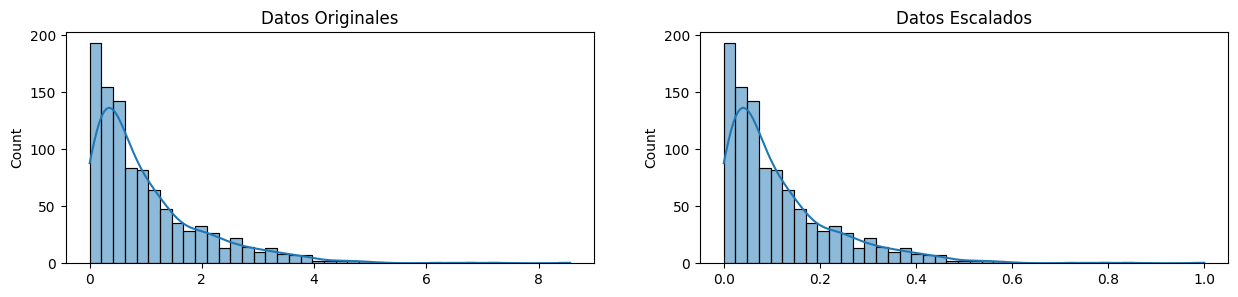

In [27]:
# Generar 1000 datos desde una distribución exponencial
original_data = np.random.exponential(size=1000)

# Escalar los datos entre 0 y 1 usando min-max
scaled_data = minmax_scaling(original_data, columns=[0])

# Graficar ambos para comparar
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos Originales")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos Escalados")
plt.show()


📌 Observa: La forma de los datos no cambió, pero ahora en lugar de ir de 0 a aproximadamente 8, van de 0 a 1.



##🔹 Normalización
El escalamiento solo cambia el rango de los datos. La normalización es una transformación más radical: su objetivo es que los datos se ajusten a una distribución normal.

#📈 Distribución normal (curva de campana):
Es una distribución estadística donde hay aproximadamente la misma cantidad de observaciones por encima y por debajo de la media, la media y la mediana son iguales, y hay más datos cerca de la media que en los extremos. También se llama distribución gaussiana.

Normalizas tus datos cuando vas a usar técnicas estadísticas o de machine learning que suponen que los datos están normalmente distribuidos, como:

Análisis discriminante lineal (LDA)

Naive Bayes Gaussiano

💡 Tip profesional: si el método incluye la palabra “Gaussian”, probablemente requiera normalización.

En este caso, usaremos la Transformación Box-Cox para normalizar. Veamos cómo se ve este proceso:

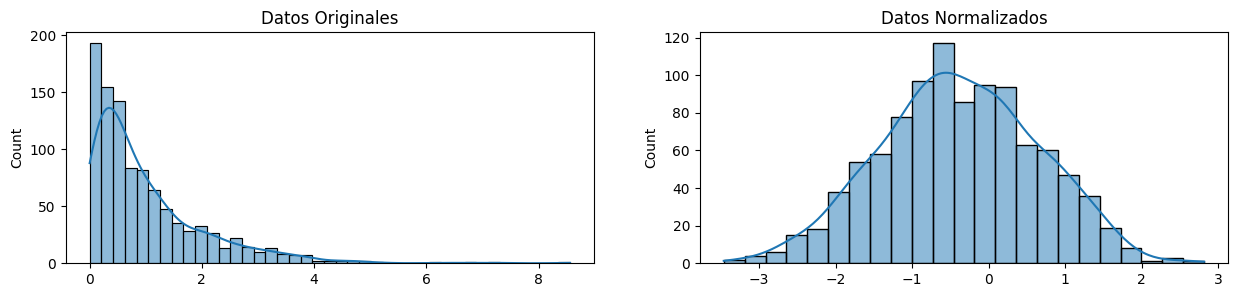

In [28]:
# Normalizar los datos exponenciales usando Box-Cox
normalized_data = stats.boxcox(original_data)

# Graficar ambos para comparar
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos Originales")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos Normalizados")
plt.show()


📌 Observa: La forma de los datos cambió. Antes de normalizar, tenían una forma tipo “L”. Después de normalizar, se asemejan más a una curva de campana (de ahí el nombre).

#📅 Trabajando con fechas


En este notebook, vamos a trabajar con fechas.

¡Comencemos!

##⚙️ Configurar el entorno
Lo primero que necesitamos hacer es cargar las librerías y el conjunto de datos que utilizaremos. Trabajaremos con un dataset que contiene información sobre deslizamientos de tierra ocurridos entre 2007 y 2016. En el siguiente ejercicio aplicarás tus nuevas habilidades en un dataset de terremotos en todo el mundo.

In [30]:
# Módulos que usaremos
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Cargar los datos
landslides = pd.read_csv("catalog.csv")

# Fijar semilla para reproducibilidad
np.random.seed(0)


🔍 ¡Hora de revisar algunas fechas!
Verificar el tipo de dato de nuestra columna de fechas
Comenzamos mirando las primeras cinco filas del dataset:

In [31]:
landslides.head()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Nos vamos a enfocar en la columna "date" del DataFrame landslides. Verifiquemos si realmente contiene fechas:

In [32]:
print(landslides['date'].head())


0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


✔️ ¡Sí, parecen fechas!

❌ Pero que nosotros, como humanos, podamos leerlas no significa que Python las entienda como fechas. De hecho, el tipo de dato (dtype) es "object".

**En Pandas, "object" suele representar texto (cadenas).**

**Si fuera una fecha, el tipo sería datetime64**.

Verifiquemos directamente el tipo de dato:

In [33]:
landslides['date'].dtype


dtype('O')

##🛠 Convertir la columna de fecha a tipo datetime

Ahora que sabemos que nuestra columna no está siendo reconocida como fecha, es momento de convertirla. A este proceso se le llama parsear fechas (parsear = interpretar las partes de una fecha desde un texto).

Usaremos el formato strftime, donde:


*   %m = mes
*   %d = día
*   %y = año con dos dígitos
*   %Y = año con cuatro dígitos


Ejemplos:

*   "1/17/07" → "%m/%d/%y"
*   "17-1-2007" → "%d-%m-%Y"

En nuestro caso, el formato es "mes/día/año con dos dígitos", así que usamos:

In [34]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")


Ahora revisamos las primeras filas de la nueva columna:

In [35]:
landslides['date_parsed'].head()


,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15


✔️ Ahora las fechas están bien interpretadas y en el formato estándar YYYY-MM-DD.



---



##⚠️ ¿Qué hacer si hay múltiples formatos de fecha?

Si tienes errores por múltiples formatos en una misma columna, puedes dejar que Pandas intente adivinar el formato automáticamente con:

In [36]:
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)


KeyError: 'Date'

❗ ¿Por qué no siempre usar infer_datetime_format=True?
Dos razones:

Pandas puede equivocarse si los formatos son muy diversos.

Es mucho más lento que especificar el formato exacto.



---



##📆 Extraer el día del mes
Ahora que tenemos fechas correctamente parseadas, podemos extraer partes como el día del mes:

In [37]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()


,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0


⚠️ Si intentáramos hacer esto con la columna original (landslides['date'].dt.day), obtendríamos un error:

AttributeError: Can only use .dt accessor with datetimelike values.





---



##📊 Graficar los días del mes (para verificar)
Uno de los errores más comunes al parsear fechas es confundir día y mes. Aunque to_datetime() ayuda con mensajes de error, ¡siempre es buena idea revisar gráficamente!

Haremos un histograma para ver cómo se distribuyen los días del mes:

<ipython-input-38-f0bd4c906976>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

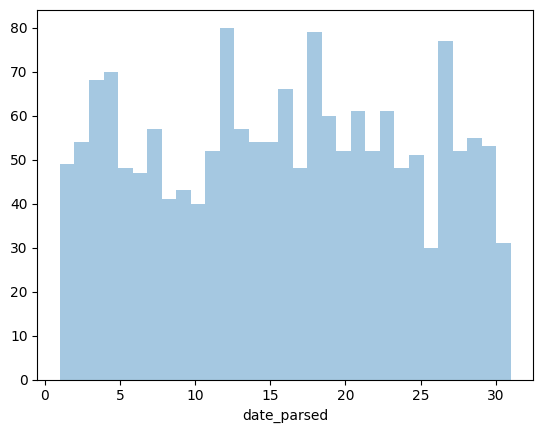

In [38]:
# Eliminar valores nulos
day_of_month_landslides = day_of_month_landslides.dropna()

# Graficar el día del mes
sns.distplot(day_of_month_landslides, kde=False, bins=31)


⚠️ Seaborn lanzará una advertencia porque distplot() está en desuso. Se recomienda usar histplot() o displot() en versiones futuras.

✔️ El gráfico muestra una distribución razonablemente pareja entre los días del mes. Eso indica que el parseo de fechas fue correcto ✅





---



#🔤 Trabajando con codificaciones de caracteres




En este notebook, vamos a trabajar con diferentes codificaciones de caracteres.

¡Empecemos!



---



##⚙️ Configurar el entorno
Primero, cargamos las librerías que vamos a usar. Todavía no cargaremos ningún dataset, ¡eso viene después!

In [39]:
# Módulos que usaremos
import pandas as pd
import numpy as np

# Módulo útil para detectar codificaciones de caracteres
import charset_normalizer

# Fijar semilla para reproducibilidad
np.random.seed(0)




---



##❓ ¿Qué son las codificaciones?

Las **codificaciones de caracteres** son conjuntos de reglas que mapean **secuencias binarias crudas** (como 0110100001101001) a caracteres legibles para humanos (como "hi").

Hay muchas codificaciones distintas, y si intentas leer un texto con una codificación diferente a la que fue originalmente escrita, terminarás con texto desordenado llamado **mojibake** (se pronuncia mo-ji-ba-ke).
Ejemplo de mojibake:

In [ ]:
æ–‡å—åŒ–ã??


También podrías obtener caracteres desconocidos si no hay un mapeo entre un byte específico y el carácter esperado. Se ven así:

In [ ]:
����������


Aunque hoy en día los errores de codificación son menos comunes, **todavía ocurren**. La codificación principal que debes conocer es UTF-8.



*   **UTF-8** es la codificación estándar de texto.
*   Todo el código en Python está en **UTF-8.**
*   Idealmente, todos tus datos deberían estar también en UTF-8.
*   Cuando no lo están, es cuando surgen problemas.



---



##🐍 Trabajar con codificaciones en Python 3
En Python 2 era complicado, pero en Python 3 (como el que usamos en Kaggle) es más simple.

Hay dos tipos de datos comunes para texto:



##1. str (cadena de texto)

In [40]:
# Empezamos con una cadena
before = "This is the euro symbol: €"

# Verificamos el tipo
type(before)
# Resultado: <class 'str'>


str

##2. bytes (secuencia de enteros)
Puedes convertir una cadena a bytes especificando la codificación:

In [41]:
# Codificamos en UTF-8, reemplazando caracteres problemáticos
after = before.encode("utf-8", errors="replace")

# Verificamos el tipo
type(after)
# Resultado: <class 'bytes'>


bytes

Si miras un objeto bytes, verás que tiene una b al inicio y códigos como \xe2\x82\xac (esto es la representación del símbolo del euro en UTF-8 cuando lo ves como ASCII).

python
Copiar
Editar


In [42]:
# Ver cómo se ve en bytes
after
# Resultado: b'This is the euro symbol: \xe2\x82\xac'


b'This is the euro symbol: \xe2\x82\xac'

##🔁 Convertir de nuevo a texto (decodificar)

In [43]:
# Convertir de vuelta a UTF-8
print(after.decode("utf-8"))
# Resultado: This is the euro symbol: €


This is the euro symbol: €




---



##❌ ¿Qué pasa si usamos la codificación equivocada?

Esto lanzará un error:

In [44]:
# Intentar decodificar con ASCII
print(after.decode("ascii"))


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

##🎧 Analogía:
Las codificaciones son como diferentes formas de grabar música (CD, cassette, etc.). Para reproducir correctamente, necesitas el reproductor adecuado. Si intentas usar el "equipo equivocado", no funcionará.



---



##⚠️ Pérdida de información si codificas mal


In [ ]:
# Cadena original
before = "This is the euro symbol: €"

# Codificamos en ASCII reemplazando caracteres no compatibles
after = before.encode("ascii", errors="replace")

# Decodificamos
print(after.decode("ascii"))
# Resultado: This is the euro symbol: ?


😱 Hemos perdido el símbolo original y no hay forma de recuperarlo.
¡Evita esto! Lo ideal es convertir todo a UTF-8 lo antes posible.





---



##📂 Leer archivos con problemas de codificación


En general, la mayoría de los archivos estarán en UTF-8. Pero a veces obtendrás un error así:

In [46]:
# Intentar leer archivo que no está en UTF-8
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

Error:

In [ ]:
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99...


Esto indica que el archivo no está en UTF-8. ¿Cómo saber qué codificación tiene?



---



##🔍 Usar charset_normalizer para detectar codificación

Una forma rápida es analizar los primeros bytes del archivo:

In [47]:
# Leer los primeros 10.000 bytes para detectar la codificación
with open("ks-projects-201801.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# Ver el resultado
print(result)
# Ejemplo de resultado: {'encoding': 'Windows-1252', 'language': 'English', 'confidence': 0.73}


{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}


✅ Leer el archivo con la codificación detectada

In [49]:
# Usar la codificación detectada
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')

# Ver las primeras filas
kickstarter_2016.head()


<ipython-input-49-4e7c402b78b2>:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Funciona correctamente, aunque muestra un aviso sobre columnas con tipos mixtos.



---



##❓ ¿Y si la codificación detectada está mal?

charset_normalizer es solo un adivinador. Si no funciona, intenta leer una parte diferente del archivo (más o menos bytes) o probar otra codificación manualmente.



---



##💾 Guardar tus archivos en UTF-8

Una vez que tienes todo en UTF-8, ¡manténlo así!
Por suerte, en Python los archivos se guardan en UTF-8 por defecto:

In [50]:
# Guardar archivo en UTF-8
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")


📢 ¡Fácil y seguro!



---



#✨ Limpieza de entradas de texto inconsistentes


En este notebook, vamos a aprender cómo limpiar entradas de texto inconsistentes.

¡Vamos allá!



---



##⚙️ Configurar el entorno
Primero, cargamos las librerías necesarias y el dataset que utilizaremos:

Instalamos fuzzywuzzy

In [54]:
!pip install fuzzywuzzy


In [55]:
# Módulos que usaremos
import pandas as pd
import numpy as np

# Módulos útiles
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# Leer el dataset
professors = pd.read_csv("pakistan_intellectual_capital.csv")

# Fijar semilla para reproducibilidad
np.random.seed(0)


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


##🔍 Preprocesamiento preliminar del texto

Comenzamos revisando las primeras filas del dataset:

In [56]:
professors.head()


,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Vamos a enfocarnos en limpiar la columna "Country" para asegurarnos de que no haya **inconsistencias en la entrada de datos.**

Podríamos revisar fila por fila y corregir a mano… pero hay una forma más eficiente 😉

In [57]:
# Obtener los valores únicos en la columna "Country"
countries = professors['Country'].unique()

# Ordenarlos alfabéticamente y observarlos
countries.sort()
countries


array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

¡Claramente hay inconsistencias! Por ejemplo:

" Germany" y "germany"

" New Zealand" y "New Zealand"



---



##🧽 Limpiar espacios y mayúsculas

Una buena práctica para limpiar texto es pasar todo a minúsculas y eliminar espacios innecesarios:

In [58]:
# Convertir todo a minúsculas
professors['Country'] = professors['Country'].str.lower()

# Eliminar espacios iniciales/finales
professors['Country'] = professors['Country'].str.strip()


Esto elimina gran parte de las inconsistencias más comunes (¡hasta un 80% según algunas fuentes!).



---



##🧠 Uso de fuzzy matching para corregir inconsistencias

Volvamos a revisar los valores únicos:

In [59]:
countries = professors['Country'].unique()
countries.sort()
countries


array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

🧐 Vemos un nuevo problema: "south korea" y "southkorea" deberían ser lo mismo.

Usaremos fuzzywuzzy para encontrar coincidencias parecidas automáticamente.
Es muy útil en datasets grandes donde corregir a mano no es viable.

In [60]:
# Obtener las 10 coincidencias más cercanas a "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# Revisarlas
matches


[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

🎯 "southkorea" tiene un 48% de similitud con "south korea" → lo suficientemente cercano para considerarlo una coincidencia.



---



##🛠 Crear una función para reemplazar coincidencias

Es una buena práctica escribir una función reutilizable:

In [62]:
# Función para reemplazar coincidencias cercanas por un string unificado
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # Obtener valores únicos
    strings = df[column].unique()

    # Obtener coincidencias cercanas
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # Filtrar solo coincidencias por sobre el umbral
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # Encontrar filas con coincidencias
    rows_with_matches = df[column].isin(close_matches)

    # Reemplazar coincidencias por el string deseado
    df.loc[rows_with_matches, column] = string_to_match

    print("¡Listo!")




---



✅ Aplicar la función

In [63]:
# Reemplazar coincidencias cercanas de "south korea"
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")
# Salida: ¡Listo!


¡Listo!


Verificamos que se haya hecho correctamente:


In [65]:
countries = professors['Country'].unique()
countries.sort()
countries


array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

¡Perfecto! 🎉 Ahora solo tenemos "south korea" en lugar de múltiples versiones desordenadas.